![](https://pbs.twimg.com/media/FOe8iHoXEAYXtG1?format=jpg&name=medium)

The aim of this project is to implement Convolutional Neural Network to classify CIFAR-10 Dataset.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Data Preprocessing </font>
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:

![CIFAR-10](https://pbs.twimg.com/media/FM9dCwwXsAEIngn?format=png&name=small)

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Check Working Directory </font>

In [1]:
import os
os.getcwd()

'C:\\Users\\amira\\Deep Learning\\Supervised Deep Learning\\2. Convolutional Neural Network'

#### <font color = blue>Import Libraries </font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

#### <font color = blue>Load the Dataset </font>

In [3]:
from keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Preprocessing and Visualization </font> 

#### <font color = blue>Data Visualization </font>

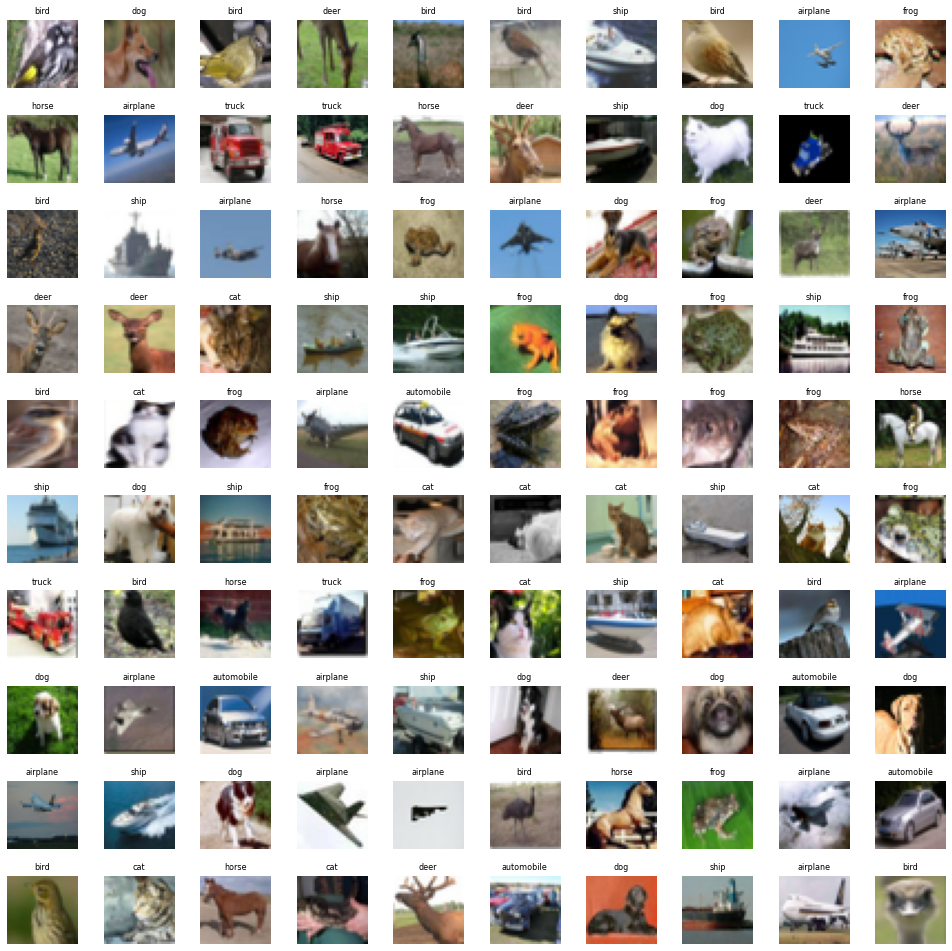

In [6]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

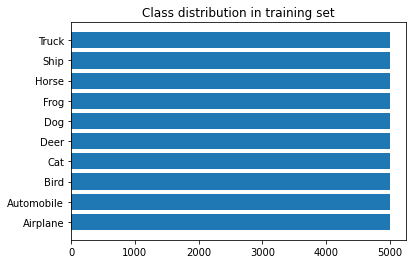

In [7]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

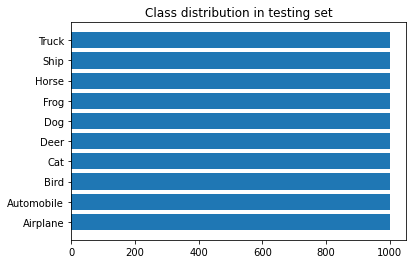

In [8]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

#### <font color = blue> Data Preprocessing </font>

In [9]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [10]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Build CNN Model</font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Implementation of Convolutional Neural network </font> 

In [11]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

#### <font color = blue> Model Summary </font>

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

#### <font color = blue> Early Stopping </font>

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Data Augmentations </font> 

In [14]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Fit the Data to Model </font> 

In [17]:
r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
             # callbacks=[early_stop],
              # batch_size=batch_size,
              )

Epoch 1/50
1562/1562 [==============================] - 39s 16ms/step - loss: 1.6190 - accuracy: 0.4152 - precision: 0.6316 - recall: 0.2058 - val_loss: 1.2085 - val_accuracy: 0.5649 - val_precision: 0.7012 - val_recall: 0.4432
Epoch 2/50
1562/1562 [==============================] - 17s 11ms/step - loss: 1.2011 - accuracy: 0.5750 - precision: 0.7375 - recall: 0.4154 - val_loss: 1.0305 - val_accuracy: 0.6409 - val_precision: 0.7471 - val_recall: 0.5365
Epoch 3/50
1562/1562 [==============================] - 18s 11ms/step - loss: 1.0284 - accuracy: 0.6439 - precision: 0.7740 - recall: 0.5143 - val_loss: 0.9654 - val_accuracy: 0.6717 - val_precision: 0.7639 - val_recall: 0.5884
Epoch 4/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.9234 - accuracy: 0.6847 - precision: 0.7985 - recall: 0.5735 - val_loss: 0.7877 - val_accuracy: 0.7323 - val_precision: 0.8237 - val_recall: 0.6413
Epoch 5/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.8558 - a

Epoch 37/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.4019 - accuracy: 0.8631 - precision: 0.9011 - recall: 0.8288 - val_loss: 0.3831 - val_accuracy: 0.8724 - val_precision: 0.9038 - val_recall: 0.8464
Epoch 38/50
1562/1562 [==============================] - 18s 12ms/step - loss: 0.4011 - accuracy: 0.8636 - precision: 0.9008 - recall: 0.8287 - val_loss: 0.4664 - val_accuracy: 0.8511 - val_precision: 0.8810 - val_recall: 0.8268
Epoch 39/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.3962 - accuracy: 0.8638 - precision: 0.9021 - recall: 0.8306 - val_loss: 0.4247 - val_accuracy: 0.8615 - val_precision: 0.8941 - val_recall: 0.8352
Epoch 40/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.3976 - accuracy: 0.8641 - precision: 0.9025 - recall: 0.8308 - val_loss: 0.4390 - val_accuracy: 0.8603 - val_precision: 0.8910 - val_recall: 0.8379
Epoch 41/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.394

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Result Evaluation</font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46> Model Evaluation </font> 

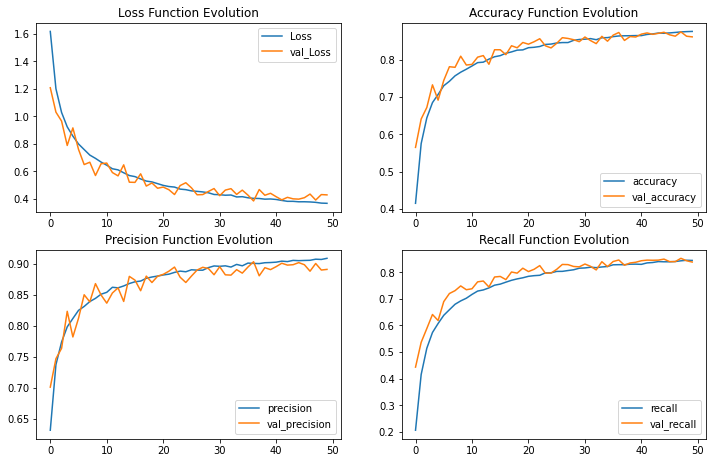

In [18]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [19]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.4274 - accuracy: 0.8607 - precision: 0.8914 - recall: 0.8386
Test Accuracy : 86.07%


### <font color = #27C3E5> 3.2: </font> <font color = #41EA46> Confusion Matrix </font> 

In [20]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

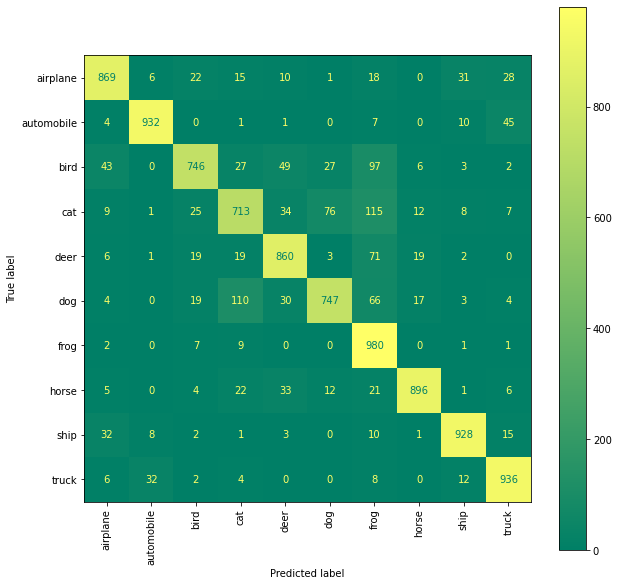

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

### <font color = #27C3E5> 3.3: </font> <font color = #41EA46> Result Summary </font> 

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1000
           1       0.95      0.93      0.94      1000
           2       0.88      0.75      0.81      1000
           3       0.77      0.71      0.74      1000
           4       0.84      0.86      0.85      1000
           5       0.86      0.75      0.80      1000
           6       0.70      0.98      0.82      1000
           7       0.94      0.90      0.92      1000
           8       0.93      0.93      0.93      1000
           9       0.90      0.94      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Test Model on Images</font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Test on one Image </font> 

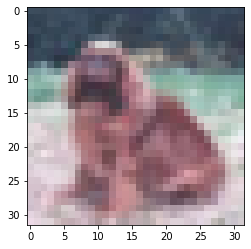

In [30]:
my_image = X_test[101]
plt.imshow(my_image)

In [31]:
# that's a Dog
y_test[101]

array([5], dtype=uint8)

In [32]:
# correctly predicted as a Dog
np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))

5

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46> Test on Multiple Images </font> 

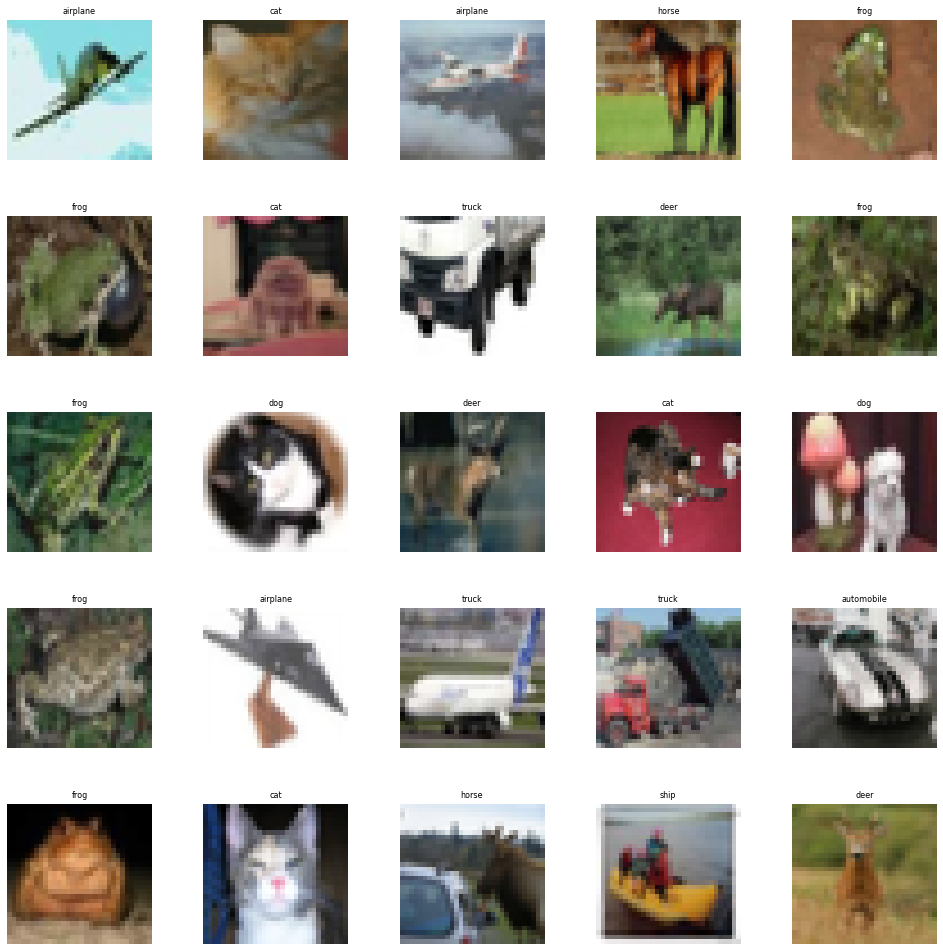

In [26]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    
    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [27]:
predictions = model.predict(X_test)

In [28]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

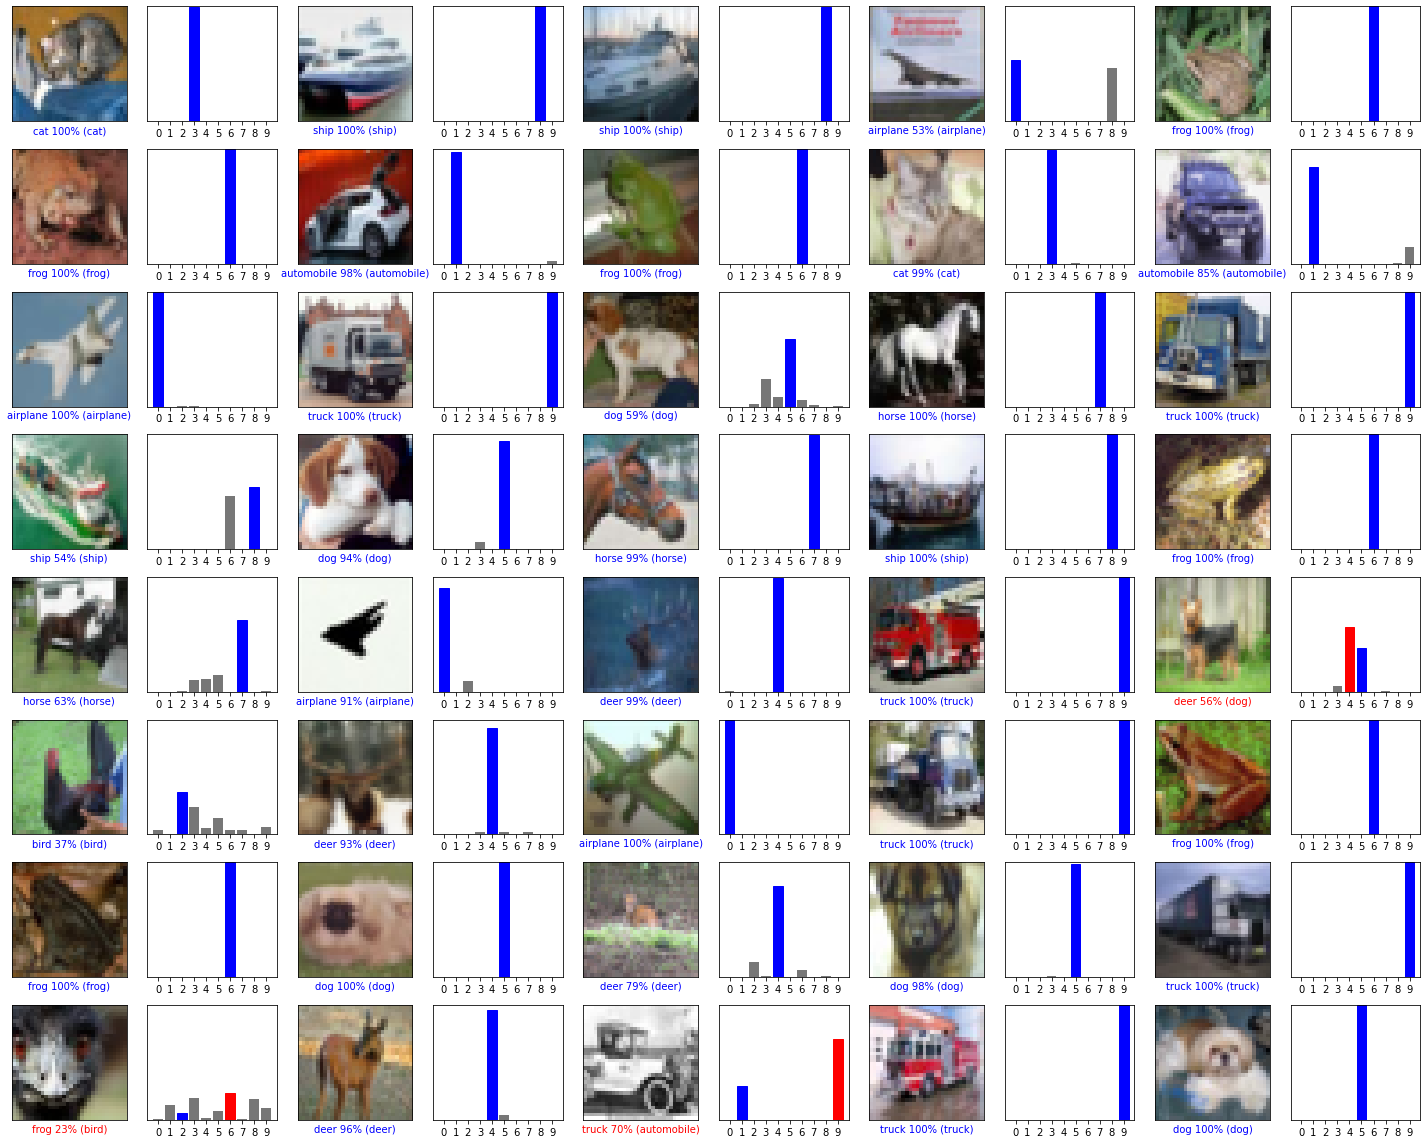

In [29]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [33]:
# Save the Model
model.save("model1")

INFO:tensorflow:Assets written to: model1\assets


![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Reference: 
[1] https://www.kaggle.com/competitions/cifar-10/data <br>
[2] https://keras.io/api/data_loading/ <br>
[3] https://keras.io/api/layers/convolution_layers/convolution2d/ <br>
[4] https://www.tensorflow.org/api_docs/python/tf/optimizers <br>
[5] https://benchmarks.ai/cifar-10#:~:text=Our%20method%20achieves%20state%2Dof,the%20previous%20record%20of%2083.1%25 <br>
[6] https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/ <br>
[7] https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c <br>